# Installs & Imports

In [ ]:
!pip install -q ucimlrepo

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import joblib
import pickle
import os
import sys

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from ucimlrepo import fetch_ucirepo

# Loading the Data

In [48]:
# Load the dataset
wine_ds = fetch_ucirepo(id=186)

In [49]:
# Extract features and labels
X = wine_ds.data.features
y = wine_ds.data.targets

In [50]:
# Create single DataFrame
df = pd.concat([X, y], axis=1)

In [51]:
# Examine the DataFrame
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Preparing the Data

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Print the shapes
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}\n")

print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (5197, 11)
y_train: (5197, 1)

X_test: (1300, 11)
y_test: (1300, 1)


# Pipeline Creation

In [54]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [55]:
# Cross validation
scores = cross_validate(
    pipeline,
    X_train,
    y_train.values.ravel(),
    cv=5,
    scoring=[
        'neg_mean_squared_error',
        'neg_mean_absolute_error',
        'neg_mean_absolute_percentage_error',
        'r2'
    ]
)

# Calculate average performance across all cross-validation folds
mean_mse = -np.mean(scores['test_neg_mean_squared_error'])
mean_rmse = np.sqrt(mean_mse)
mean_mae = -np.mean(scores['test_neg_mean_absolute_error'])
mean_mape = -np.mean(scores['test_neg_mean_absolute_percentage_error'])
mean_r2 = np.mean(scores['test_r2'])

# Print the result
print(f"Average MSE from 5-fold cross-validation: {mean_mse}")
print(f"Average RMSE from 5-fold cross-validation: {mean_rmse}")
print(f"Average MAE from 5-fold cross-validation: {mean_mae}")
print(f"Average MAPE from 5-fold cross-validation: {mean_mape}")
print(f"Average R2 from 5-fold cross-validation: {mean_r2}")

Average MSE from 5-fold cross-validation: 0.5410798367144317
Average RMSE from 5-fold cross-validation: 0.7355812917104619
Average MAE from 5-fold cross-validation: 0.56965632761326
Average MAPE from 5-fold cross-validation: 0.10141970637249242
Average R2 from 5-fold cross-validation: 0.2952453498225641


# Model Evaluation

In [56]:
# Fit the pipeline
pipeline.fit(X_train, y_train.values.ravel())

# Evaluate the pipeline
predictions = pipeline.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2: {r2}")

MSE: 0.5466964419594444
RMSE: 0.7393892357611412
MAE: 0.5658710079723465
MAPE: 0.10082784622308341
R2: 0.2597673129771396


In [57]:
# Create metrics DataFrame
metrics_df = pd.DataFrame(
    [mse, rmse, mae, mape, r2],
    index=['MSE', 'RMSE', 'MAE', 'MAPE', 'R2'],
    columns=['Value']
)
metrics_df

,Value
MSE,0.546696
RMSE,0.739389
MAE,0.565871
MAPE,0.100828
R2,0.259767


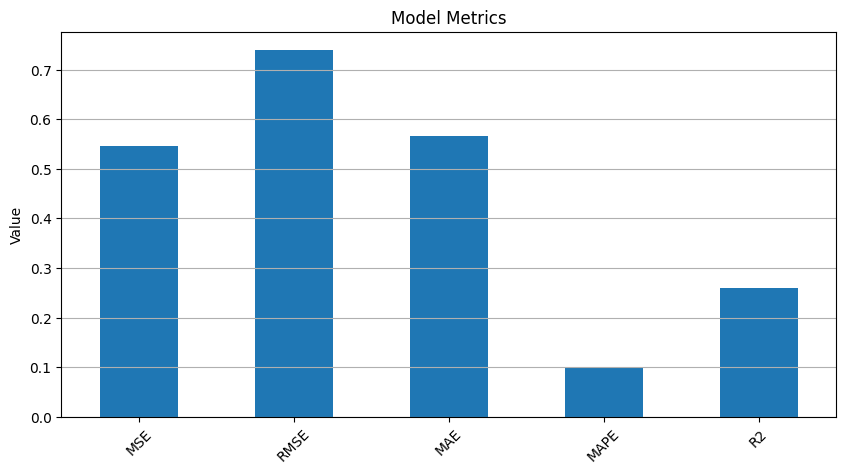

In [58]:
# Plot metrics
metrics_df.plot(kind='bar', figsize=(10, 5), legend=False)
plt.title('Model Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [59]:
# Save the pipeline object
with open('pipeline_linreg.pkl', 'wb') as f:
    pickle.dump(pipeline, f)